In [9]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

In [10]:
data = pd.read_csv("Ising/Test_for_canonicalModel/all.txt", sep=" ")
#data

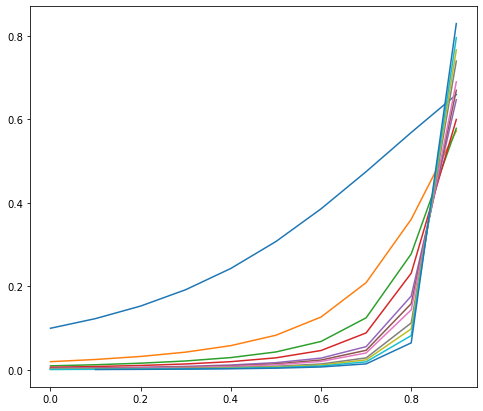

In [3]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])


fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    mag = data_l[:,15]
 

    plt.plot(J_l, mag)

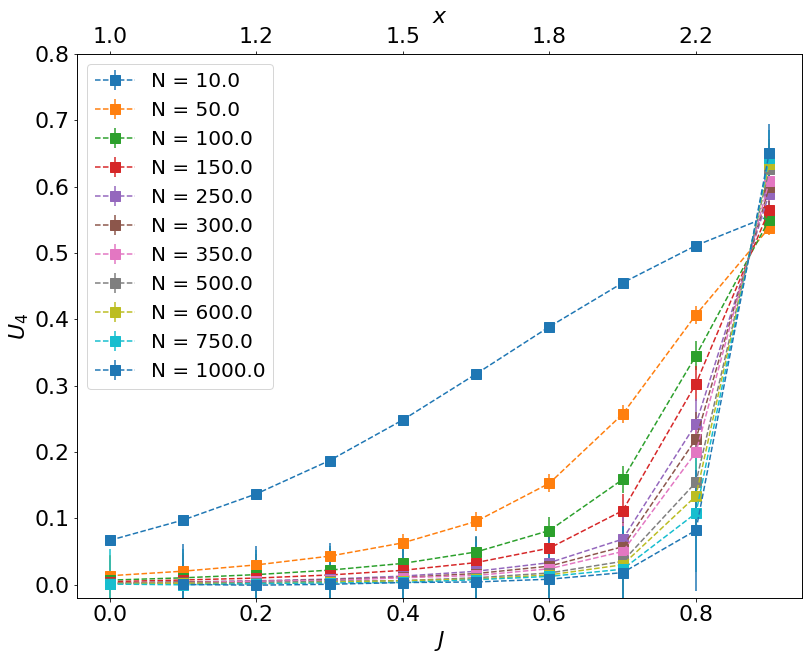

In [4]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical.png")

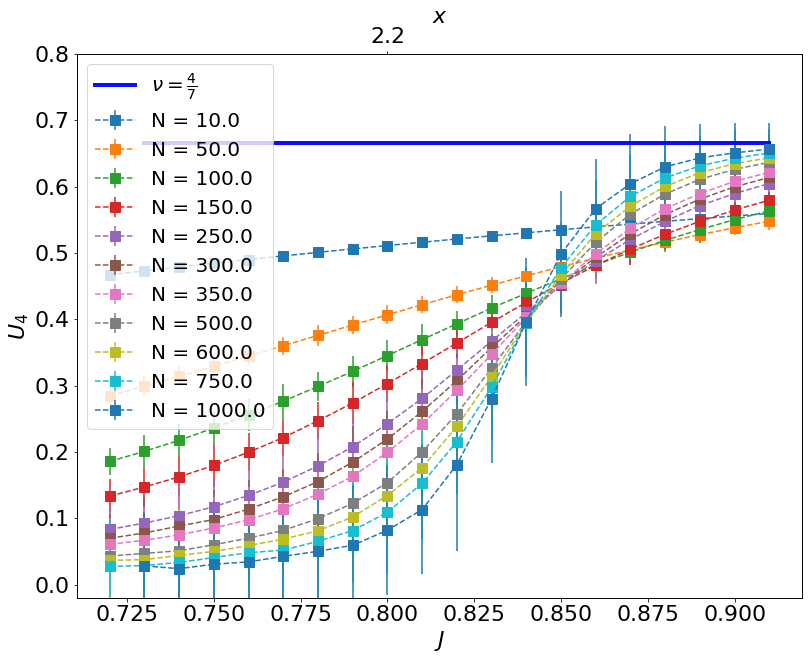

In [6]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeper.png")

In [7]:
errs

array([0.08115636, 0.08585765, 0.08850089, 0.07895338, 0.07913038,
       0.0843166 , 0.09048026, 0.09790309, 0.09719257, 0.13029794,
       0.09748796, 0.09683902, 0.09446927, 0.07567858, 0.07432597,
       0.06093161, 0.0504543 , 0.0449615 , 0.03900835])

In [13]:
def r_on_n(n, nu, b):
    
    
    return 2*nu*n+b

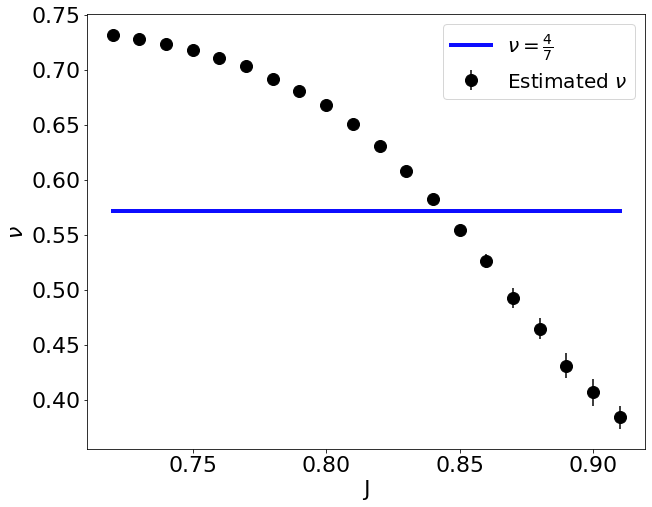

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    

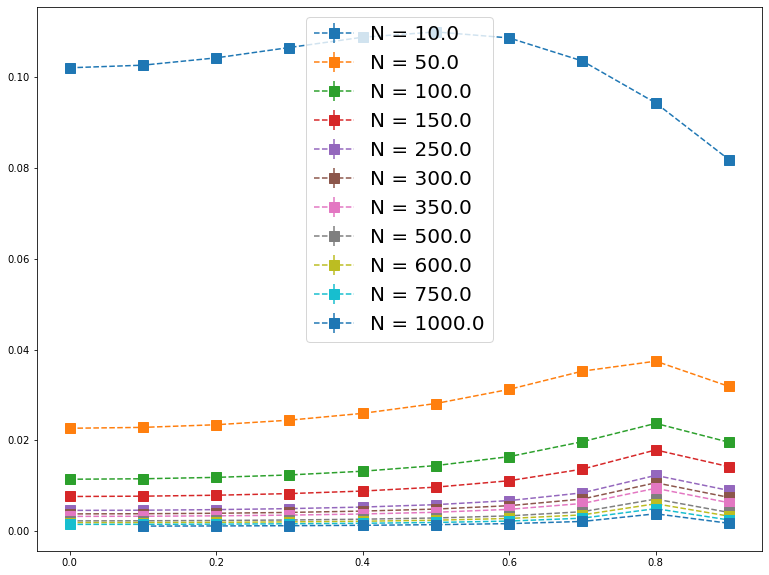

In [15]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = data_l[:,9] - data_l[:,7]*data_l[:,7]
    errs = np.zeros_like(J_l)#(2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)


plt.legend(loc="best", fontsize=20)

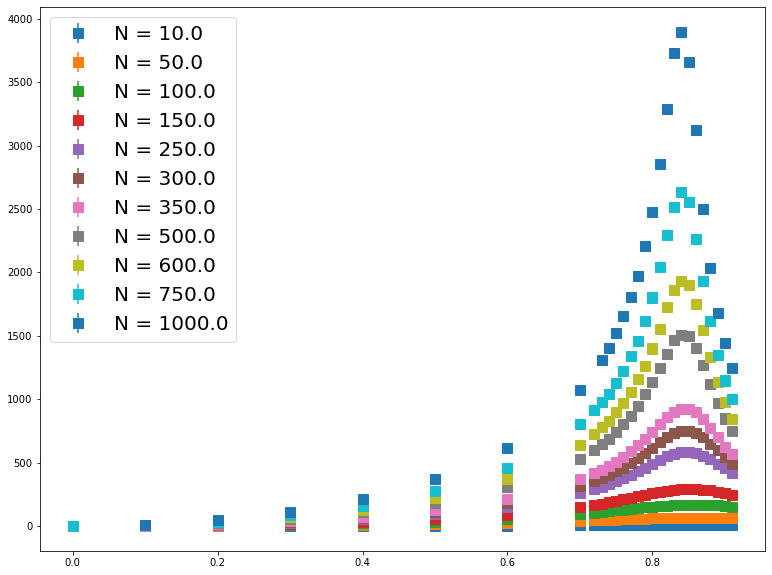

In [24]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
data_np1 = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
data_np=np.vstack((data_np, data_np1))
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l*l
    errs = np.zeros_like(J_l)#(2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)


plt.legend(loc="best", fontsize=20)

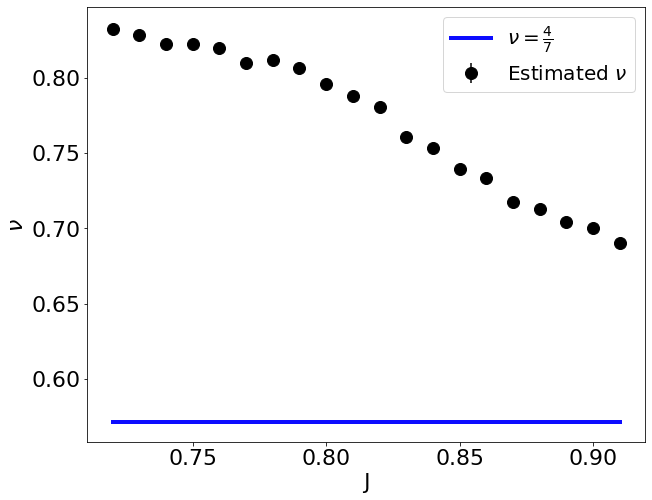

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,5]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    